## Plot approximate solutions for the SDOF problem

In [1]:
import numpy as np
import math

import matplotlib.pyplot as plt
%matplotlib inline
#plt.style.use('classic')


import time

from functions.BernsteinPols import BP, dBP
from functions.construct_B import construct_B
from functions.iteration import SDOF_integration
from functions.make_solution import get_displacement, get_speed, get_acceleration, get_solution

Define parameters for the SDOF system

In [13]:
m   = 1.5               # the mass, >0
c   = 0.1               # the damping coefficient, >= 0
k   = 1                 # the stiffness coefficient, >0
x0  = 0.1               # the initial displacement
dx0 = -0.1              # the initial speed
def force(t):           # the excitation function
	# return 0
	return np.sin(t)

Define parameters for the approximation

In [14]:
p   = 5                 # p-1 is the degree of polynomial approximation, p>= 3
h   = 0.1               # the timestep, >0
l   = 100               # the number of iterations, >0

Initialize and run the algorithm

In [15]:
t0 = time.time()
c = c/m
k = k/m
def f(t):
    return force(t)/m

sdof_int = SDOF_integration(p, c, k, x0, dx0, f, h, l)
t_init = time.time()
BP_coefs = sdof_int.integrator()
t_series, approx_disp, approx_sp, approx_acc = get_solution(BP_coefs, c, k, f, h)
t_solve = time.time() - t_init

In [16]:
print("Initialization took {i:.2e} sec, and execution took {e:.2e} sec".format(i = t_init-t0, e = t_solve))

Initialization took 8.44e-02 sec, and execution took 1.80e-02 sec


Plot approximate displacement

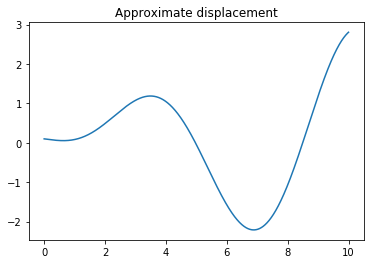

In [17]:
fig = plt.figure()
ax = plt.axes()
plt.title("Approximate displacement")
ax.plot(t_series, approx_disp);
plt.show()

Plot approximate speed

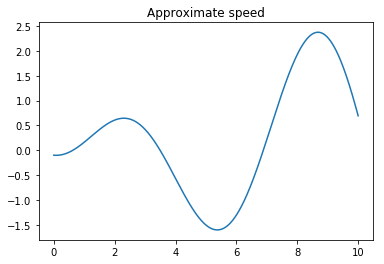

In [18]:
fig = plt.figure()
ax = plt.axes()
plt.title("Approximate speed")
ax.plot(t_series, approx_sp);
plt.show()

Plot approximate acceleration

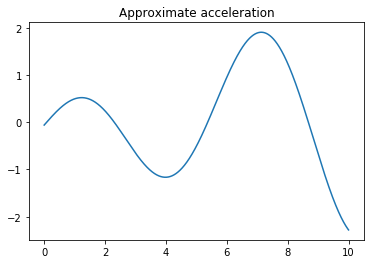

In [19]:
fig = plt.figure()
ax = plt.axes()
plt.title("Approximate acceleration")
ax.plot(t_series, approx_acc);
plt.show()